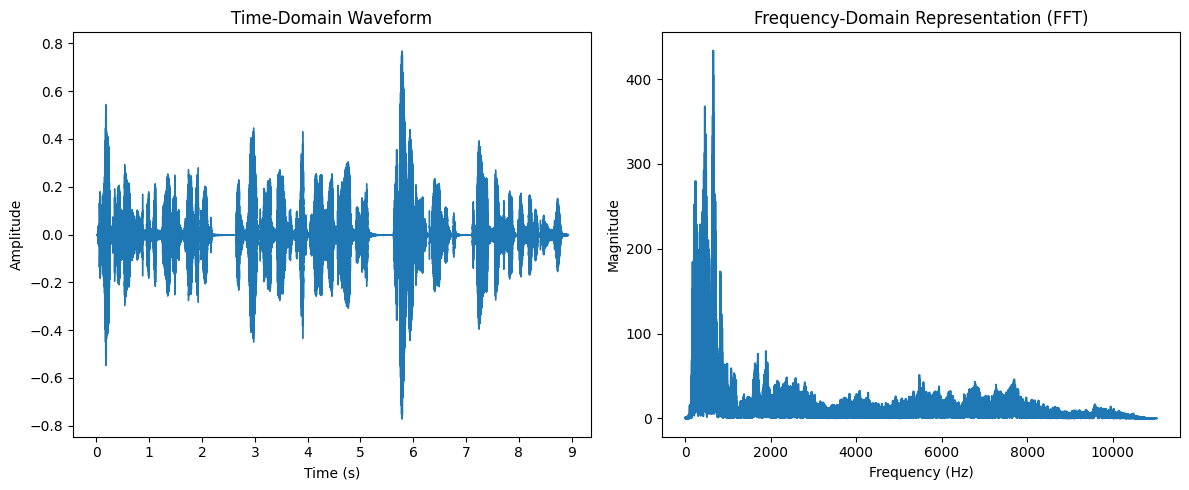

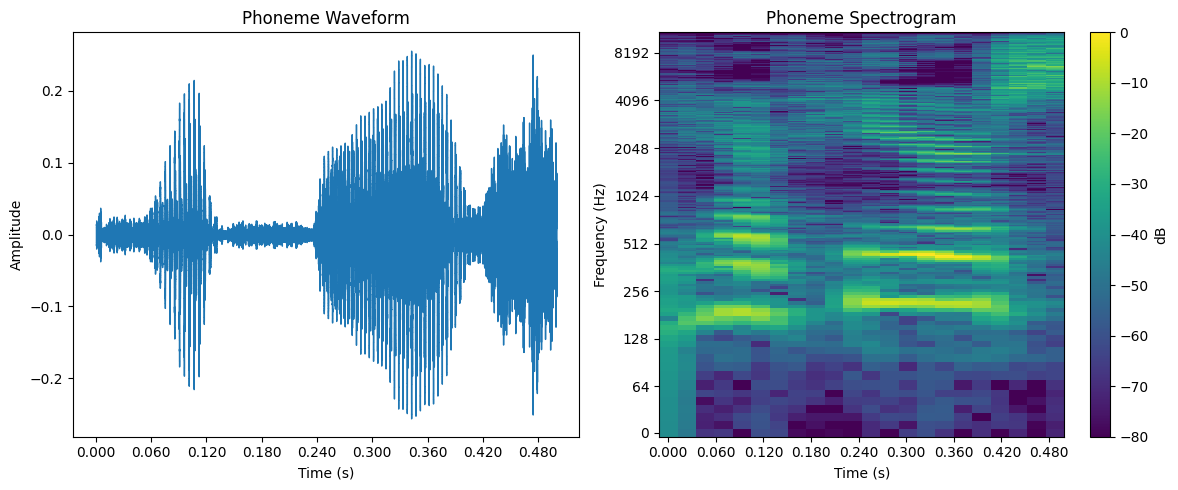

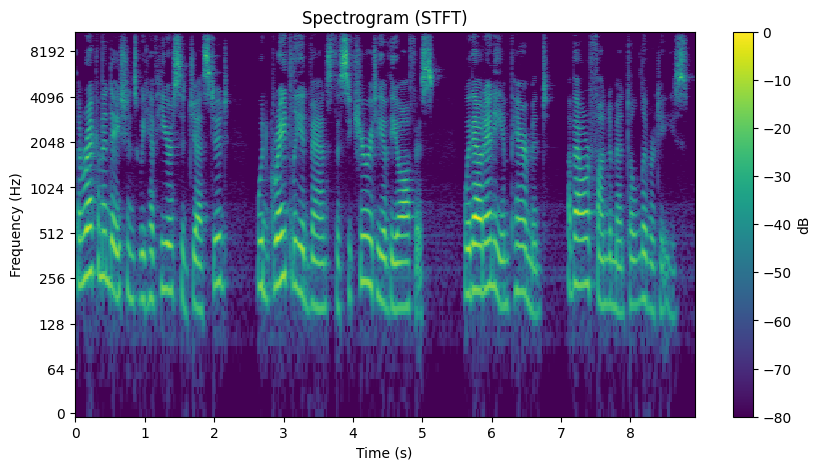

Energy in Vowel Range (300-3000 Hz): 982512.50
Energy in Consonant/Fricative Range (4000-8000 Hz): 84738.16
Energy Ratio (Vowels / Consonants): 11.59


In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the speech signal
audio_path = 'LJ050-0278.wav'
signal, sr = librosa.load(audio_path, sr=None)

def plot_waveform_and_fft(signal, sr):
    #Plot the time-domain waveform and its FFT representation
    plt.figure(figsize=(12, 5))

    # Time-domain representation
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(signal, sr=sr)
    plt.title('Time-Domain Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Frequency-domain representation (FFT)
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(fft_result), 1/sr)
    plt.subplot(1, 2, 2)
    plt.plot(freq[:len(freq)//2], np.abs(fft_result)[:len(fft_result)//2])
    plt.title('Frequency-Domain Representation (FFT)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

plot_waveform_and_fft(signal, sr)

# Extract a phoneme segment (1s to 1.5s segment)
start_time = 1.0
end_time = 1.5
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
phoneme_segment = signal[start_sample:end_sample]

def plot_phoneme_waveform_and_spectrogram(segment, sr):
    #Plot the waveform and spectrogram of the extracted phoneme segment
    plt.figure(figsize=(12, 5))

    # Waveform of the phoneme segment
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(segment, sr=sr)
    plt.title('Phoneme Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Spectrogram of the phoneme segment
    stft_result = librosa.stft(segment)
    stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)
    plt.subplot(1, 2, 2)
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(label='dB')
    plt.title('Phoneme Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

plot_phoneme_waveform_and_spectrogram(phoneme_segment, sr)

# Short-Time Fourier Transform (STFT) & Spectrogram
def plot_spectrogram(signal, sr):
    #Compute and plot the STFT Spectrogram
    stft_result = librosa.stft(signal)
    stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(label='dB')
    plt.title('Spectrogram (STFT)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

plot_spectrogram(signal, sr)

# Energy distribution in vowels vs consonants
def compute_energy(signal, sr):
    #Compute and compare energy in vowels (300-3000 Hz) and consonants (4000-8000 Hz)
    stft_result = np.abs(librosa.stft(signal)) ** 2  # Compute power spectrum
    freqs = librosa.fft_frequencies(sr=sr)

    # Extract energy in low and high-frequency bands
    low_energy = np.sum(stft_result[(freqs >= 300) & (freqs <= 3000)])
    high_energy = np.sum(stft_result[(freqs >= 4000) & (freqs <= 8000)])

    # Compute energy ratio
    energy_ratio = low_energy / high_energy if high_energy > 0 else np.inf

    print(f'Energy in Vowel Range (300-3000 Hz): {low_energy:.2f}')
    print(f'Energy in Consonant/Fricative Range (4000-8000 Hz): {high_energy:.2f}')
    print(f'Energy Ratio (Vowels / Consonants): {energy_ratio:.2f}')

compute_energy(signal, sr)
